In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd

try:
    df = pd.read_csv("heart_disease_dataset.csv")
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")

In [3]:
# data cleaning
# exploratory data analysis
# text preprocessing
# model building 
# evaluation
df.shape

(1186, 26)

In [4]:
df.sample(10)

,Disease,age,gender,chest_pain,sugar,restecg,exang,slope,CA,thal,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
971,Stroke,69,male,2,125,2,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885,Stroke,55,male,2,54,2,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,Congestive Heart Failure,60,male,1,110,0,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,Normal,34,female,2,121,0,0,2,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,Coronary Artery Disease,25,female,2,100,2,1,2,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1131,Normal,86,male,2,122,0,0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,Congestive Heart Failure,27,male,3,56,1,1,1,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,Stroke,55,male,2,54,2,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
817,Normal,56,male,1,105,0,0,2,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,Stroke,80,female,1,54,2,1,2,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Disease      1186 non-null   object 
 1   age          1186 non-null   int64  
 2   gender       1186 non-null   object 
 3   chest_pain   1186 non-null   int64  
 4   sugar        1186 non-null   int64  
 5   restecg      1186 non-null   int64  
 6   exang        1186 non-null   int64  
 7   slope        1186 non-null   int64  
 8   CA           1186 non-null   int64  
 9   thal         1186 non-null   int64  
 10  bp           1186 non-null   int64  
 11  cholesterol  1186 non-null   int64  
 12  thalach      1186 non-null   int64  
 13  oldpeak      1186 non-null   int64  
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unname

In [6]:
df.drop(df.iloc[:,14:],inplace=True,axis = 1)
df.head()

,Disease,age,gender,chest_pain,sugar,restecg,exang,slope,CA,thal,bp,cholesterol,thalach,oldpeak
0,Coronary Artery Disease,25,female,2,100,2,1,2,3,3,120,50,80,100
1,High Blood Pressure,40,female,3,120,1,0,3,0,3,300,70,150,80
2,Congestive Heart Failure,60,male,1,110,0,1,1,2,2,150,40,98,120
3,Stroke,75,male,3,165,2,0,2,0,3,132,55,88,121
4,Congestive Heart Failure,60,male,1,110,0,1,1,2,2,150,40,98,120


In [7]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      1186 non-null   object
 1   age          1186 non-null   int64 
 2   gender       1186 non-null   object
 3   chest_pain   1186 non-null   int64 
 4   sugar        1186 non-null   int64 
 5   restecg      1186 non-null   int64 
 6   exang        1186 non-null   int64 
 7   slope        1186 non-null   int64 
 8   CA           1186 non-null   int64 
 9   thal         1186 non-null   int64 
 10  bp           1186 non-null   int64 
 11  cholesterol  1186 non-null   int64 
 12  thalach      1186 non-null   int64 
 13  oldpeak      1186 non-null   int64 
dtypes: int64(12), object(2)
memory usage: 129.8+ KB


In [8]:
df.isnull().sum()

Disease        0
age            0
gender         0
chest_pain     0
sugar          0
restecg        0
exang          0
slope          0
CA             0
thal           0
bp             0
cholesterol    0
thalach        0
oldpeak        0
dtype: int64

In [9]:
# check for duplicate values 
df.duplicated().sum()

1126

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [39]:
df['Target']=encoder.fit_transform(df['Disease'])
df['gender']=encoder.fit_transform(df['gender'])
# df.drop(columns=['Encoded value'],inplace=True,axis=1)
df

,Disease,age,gender,chest_pain,sugar,restecg,exang,slope,CA,thal,bp,cholesterol,thalach,oldpeak,Target
0,Coronary Artery Disease,25,0,2,100,2,1,2,3,3,120,50,80,100,1
1,High Blood Pressure,40,0,3,120,1,0,3,0,3,300,70,150,80,2
2,Congestive Heart Failure,60,1,1,110,0,1,1,2,2,150,40,98,120,0
3,Stroke,75,1,3,165,2,0,2,0,3,132,55,88,121,4
4,Congestive Heart Failure,60,1,1,110,0,1,1,2,2,150,40,98,120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,Normal,86,1,2,122,0,0,1,1,1,111,80,64,88,3
1182,Normal,23,0,1,123,0,0,0,1,0,170,101,67,165,3
1183,Normal,66,0,1,124,0,0,2,1,2,150,40,98,120,3
1184,Normal,39,1,0,125,0,0,1,0,3,110,150,70,110,3


In [55]:
df.values[0][0:14]

array(['Coronary Artery Disease', 25, 0, 2, 100, 2, 1, 2, 3, 3, 120, 50,
       80, 100], dtype=object)

# Exploratory data analysis

Normal                       3   

Congestive Heart Failure     0

Stroke                       4

high cholesterol             5

low blood pressure           6

Coronary Artery Disease      1

High Blood Pressure          2

male   == 1
female == 0


In [12]:
df['Disease'].value_counts()

Normal                      484
Congestive Heart Failure    292
Stroke                      168
high cholesterol             98
low blood pressure           70
Coronary Artery Disease      38
High Blood Pressure          36
Name: Disease, dtype: int64

In [13]:
df['Target'].value_counts()

3    484
0    292
4    168
5     98
6     70
1     38
2     36
Name: Target, dtype: int64

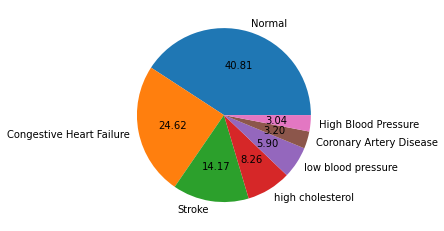

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.pie(df['Disease'].value_counts(),labels=['Normal','Congestive Heart Failure','Stroke','high cholesterol','low blood pressure','Coronary Artery Disease','High Blood Pressure'],autopct='%0.2f')
plt.show()

In [15]:
y =  df['Target']
y.value_counts()

df['gender'].value_counts()

1    620
0    566
Name: gender, dtype: int64

C:\Users\vedan\AppData\Local\Temp\ipykernel_22184\3028442158.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


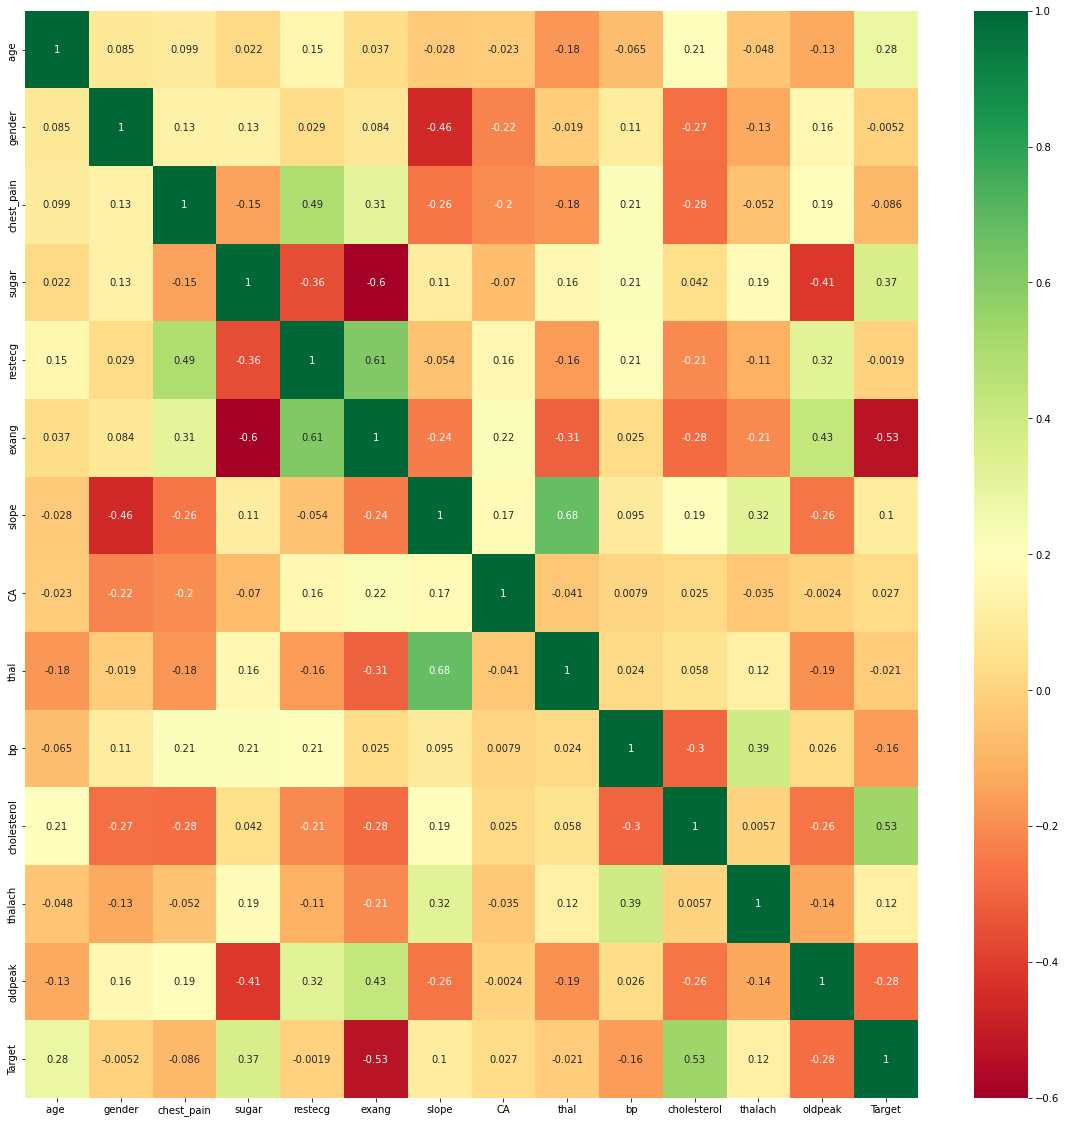

In [16]:
import seaborn as sns
corrmat = df.corr()
top_corr_feat = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_feat].corr(),annot=True,cmap="RdYlGn")

In [87]:
# y=df.iloc[:,14:]

# X=df.iloc[:,:13]
# X
# print(y)
y=df.values[:,14:]
y=y.astype('int')      # y 's data type is obejct so converting it into integer 

X=df.values[:,1:13]
X
print(y)
print(X)

[[1]
 [2]
 [0]
 ...
 [3]
 [3]
 [1]]
[[25 0 2 ... 120 50 80]
 [40 0 3 ... 300 70 150]
 [60 1 1 ... 150 40 98]
 ...
 [66 0 1 ... 150 40 98]
 [39 1 0 ... 110 150 70]
 [25 0 2 ... 120 50 80]]


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.linear_model import LogisticRegression


lr=LogisticRegression()
gb=GaussianNB()
bn=BernoulliNB()
mb=MultinomialNB()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=125)

In [84]:
# y_test.shape
# a=y_train.ravel()
# a.shape
# y=y.astype('int')


In [90]:
# gb.fit(X_train,y_train.values.ravel())
lr.fit(X_train,y_train.ravel())

C:\Users\vedan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
y_train[10]

array([4])

In [106]:
print(X[0])
print(y[0])

[25 0 2 100 2 1 2 3 3 120 50 80]
[1]


In [151]:
ip=(48, 0, 0, 120, 0, 1, 2, 1, 1, 98, 147,100)
ip=np.asarray(ip)
ip=ip.reshape(1,-1)
# lr.predict
ip

array([[ 48,   0,   0,  88,   0,   1,   2,   1,   1,  98, 147, 100]])

In [152]:
lr.predict(ip)[0]

0

In [105]:
X_test_pred=lr.predict(X_test)

In [157]:
df[df['Target']==3].sample(1).values

array([['Normal ', 23, 0, 1, 123, 0, 0, 0, 1, 0, 170, 101, 67, 165, 3]],
      dtype=object)

In [150]:
df


,Disease,age,gender,chest_pain,sugar,restecg,exang,slope,CA,thal,bp,cholesterol,thalach,oldpeak,Target
0,Coronary Artery Disease,25,0,2,100,2,1,2,3,3,120,50,80,100,1
1,High Blood Pressure,40,0,3,120,1,0,3,0,3,300,70,150,80,2
2,Congestive Heart Failure,60,1,1,110,0,1,1,2,2,150,40,98,120,0
3,Stroke,75,1,3,165,2,0,2,0,3,132,55,88,121,4
4,Congestive Heart Failure,60,1,1,110,0,1,1,2,2,150,40,98,120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,Normal,86,1,2,122,0,0,1,1,1,111,80,64,88,3
1182,Normal,23,0,1,123,0,0,0,1,0,170,101,67,165,3
1183,Normal,66,0,1,124,0,0,2,1,2,150,40,98,120,3
1184,Normal,39,1,0,125,0,0,1,0,3,110,150,70,110,3
